In [1]:
import string
from sklearn.model_selection import train_test_split
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import math
from statistics import mean

%matplotlib inline

In [2]:
# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

In [3]:
# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

In [4]:
class NeuralNetwork:
    def __init__(self, x, y, lr):
        self.input      = x
        self.hidden     = 48
        self.weights1   = np.random.rand(self.input.shape[1], self.hidden) 
        self.weights2   = np.random.rand(self.hidden, 1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.lr         = lr

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return deepcopy(self.output)

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1 * self.lr
        self.weights2 += d_weights2 * self.lr
        
    def predict(self, x_input):
        l1 = sigmoid(np.dot(x_input, self.weights1))
        out_pred = sigmoid(np.dot(l1, self.weights2))
        return deepcopy(out_pred)
        

In [5]:
pos_txt = open('./pos_sentiment.txt')
neg_txt = open('./neg_sentiment.txt')

X = []
Y = []

for line in pos_txt:
    line = line.translate(str.maketrans('', '', string.punctuation)).rstrip()
    X.append(line)
    Y.append(1)

for line in neg_txt:
    line = line.translate(str.maketrans('', '', string.punctuation)).rstrip()
    X.append(line)
    Y.append(0)
    
len(X)

6662

In [6]:
def makeVocab(data):
    vocab = []
    for d in data:
        for w in d.split(" "):
            vocab.append(w)
    
    return sorted(set(vocab))

In [7]:
def getIndexInVocab(vocab, word):
    if word not in vocab:
        return 0
    return vocab.index(word) + 2

In [8]:
def padding(sentence, padLen):
    pad_sent = []
    i = 0
    for s in sentence:
        pad_sent.append(s)
        i += 1
        if i == padLen:
            break
    
    rem_len = padLen - len(pad_sent)
    for i in range(rem_len):
        pad_sent.append(1)
    
    return pad_sent

In [9]:
def makeVectorized(list_sent, vocab, maxlen=120):
    ans = []

    for l in list_sent:
        sent = []
        for w in l.split(" "):
            sent.append(getIndexInVocab(vocab, w))
        
        sent = padding(sent, maxlen)
        ans.append(sent)
    
    return ans

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18)

In [11]:
print( len(X_train) , len(X_test))

5329 1333


In [12]:
vocab = makeVocab(X_train)

In [13]:
x_train = np.array(makeVectorized(X_train,vocab))
x_test = np.array(makeVectorized(X_test, vocab))

In [14]:
y_train = np.array(y_train).reshape(-1, 1)
y_train.shape

(5329, 1)

LR = 0.1


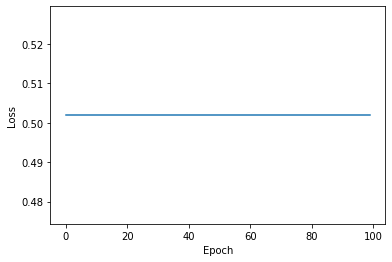

LR = 0.2


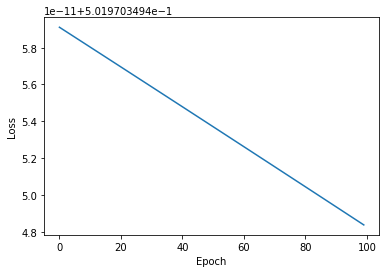

LR = 0.3


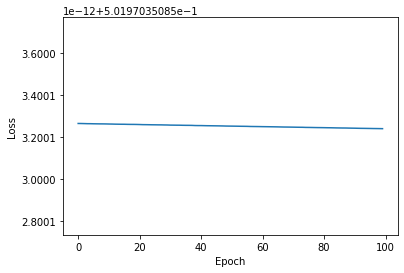

LR = 0.4


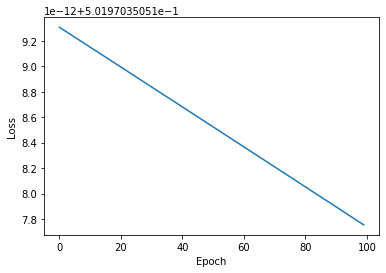

LR = 0.5


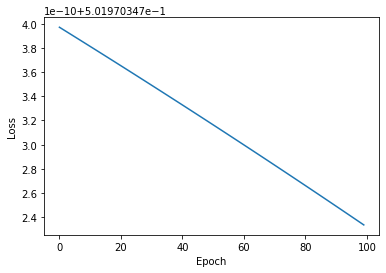

LR = 0.6


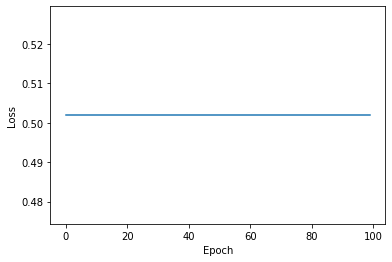

LR = 0.7


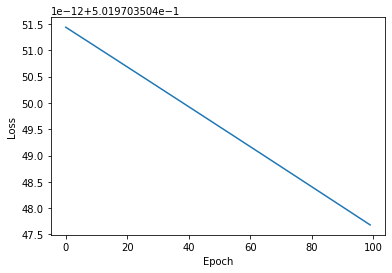

LR = 0.8


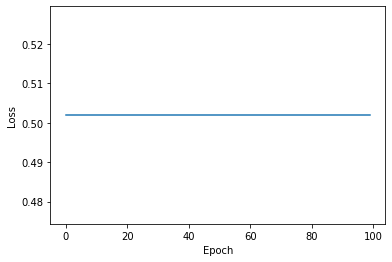

LR = 0.9


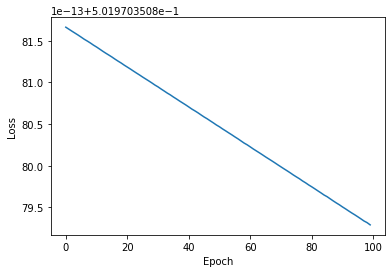

LR = 1.0


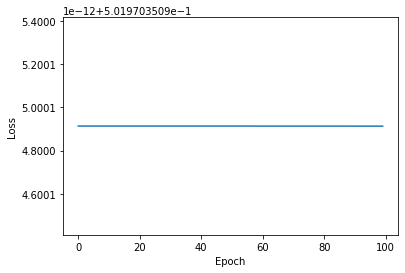

In [15]:
epoch = 100
bestModel = None
lowestLoss = math.inf
lr_val = []
loss_lr_data = []

for lr in range(1, 11):
    model = NeuralNetwork(x_train, y_train, lr/10)
    l = []
    
    for i in range(epoch):
        pred_e = model.feedforward()
        model.backprop()
        l.append(np.mean(np.square(y_train - pred_e)))
    
    if mean(l) < lowestLoss:
        bestModel = model
        lowestLoss = mean(l)
    
    print("LR = " + str(lr/10))
    plt.plot(range(len(l)), l)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    lr_val.append(lr/10)
    loss_lr_data.append(mean(l))

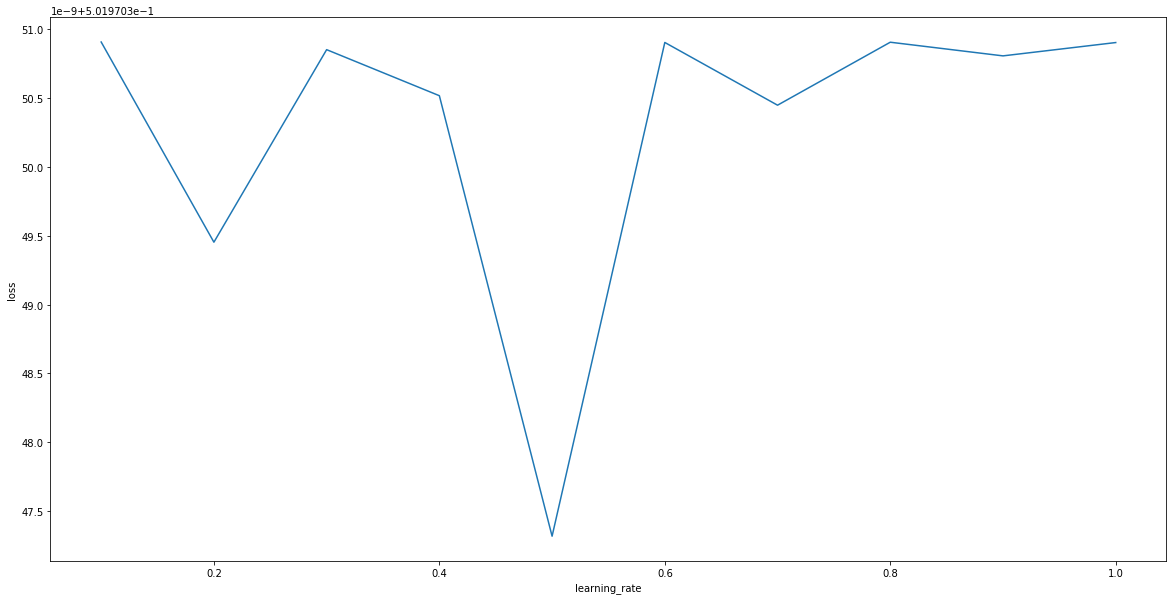

In [16]:
plt.rcParams['figure.figsize'] = [20,10]
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.plot(lr_val, loss_lr_data)
plt.show()

In [17]:
# PREDICTION

y_pred = bestModel.predict(x_test)
y_pred = np.round(y_pred)

print("Precision Score = " + str(precision_score(y_test, y_pred)))
print("Recall Score = " + str(recall_score(y_test, y_pred)))
print("F Score = " + str(f1_score(y_test, y_pred)))
print("Accuracy = " + str(accuracy_score(y_test, y_pred)))

Precision Score = 0.5078769692423106
Recall Score = 1.0
F Score = 0.6736318407960199
Accuracy = 0.5078769692423106
